### Biodiversity Project

### Introduction
You are a biodiversity analyst working for the National Parks Service.  You're going to help them analyze some data about species at various national parks.

### Step 1
Import the modules that you'll be using in this assignment:
- matplotlib
- pandas

In [58]:
# Your code here
import matplotlib
import pandas as pd

### Step 2
You have been given a CSV file `species_info.csv` with data about different species in our National Parks, including:
- The scientific name of each species
- The common names of each species
- The species conservation status

Load the dataset and inspect it:
- Load `species_info.csv` into a DataFrame called `species`

What information is contained in the csv?

In [59]:
# Your code here
# URL: https://drive.google.com/u/1/uc?id=1apgJ89cw8UipJYZZqVL4tZVQGUD1Gz_Q&export=download
import pandas as pd
df = pd.read_csv("https://drive.google.com/u/1/uc?id=1apgJ89cw8UipJYZZqVL4tZVQGUD1Gz_Q&export=download")
df

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


### Step 3
Let's start by learning a bit more about our data.
Question:
1. How many different species are there in the species DataFrame?
2. What are the different values of category in species?
3. What are the different values of conservation_status?

In [60]:
# Your code here
num_species=df['scientific_name'].nunique()
print(num_species)

category=df['category'].unique()
print(category)

df['conservation_status'].unique()

5541
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [61]:
#better way
df['category'].value_counts()


Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64

In [62]:
### Fix the data

#use set as de-duplication
def merge_common_names(srs): #srs with the same scientific name
    all_items=set()
    for row in srs:
        splited = [item.strip() for item in row.split(",")]
        all_items = all_items.union(set(splited))
    return all_items

cleaned_df=df.groupby("scientific_name").agg({
    "category": "first",  #this agg func can be 'frist' or 'last'
    "conservation_status":'last',
    "common_names": merge_common_names
}).reset_index()

cleaned_df

,scientific_name,category,conservation_status,common_names
0,Abies bifolia,Vascular Plant,None,{Rocky Mountain Alpine Fir}
1,Abies concolor,Vascular Plant,None,"{White Balsam, White Fir, Balsam Fir, Colorado..."
2,Abies fraseri,Vascular Plant,Species of Concern,{Fraser Fir}
3,Abietinella abietina,Nonvascular Plant,None,{Abietinella Moss}
4,Abronia ammophila,Vascular Plant,Species of Concern,"{Wyoming Sand Verbena, Yellowstone Sand Verbena}"
...,...,...,...,...
5536,Zonotrichia leucophrys gambelii,Bird,None,{Gambel's White-Crowned Sparrow}
5537,Zonotrichia leucophrys oriantha,Bird,None,{Mountain White-Crowned Sparrow}
5538,Zonotrichia querula,Bird,None,{Harris's Sparrow}
5539,Zygodon viridissimus,Nonvascular Plant,None,{Zygodon Moss}


### Step 4
Let's start doing some analysis!

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currnetly neither in danger of extinction throughout all or a significant portion of its range


Instruction:
1. How many species are there in each of these status?

In [63]:
### Your code here
cleaned_df.value_counts("conservation_status")

conservation_status
Species of Concern    151
Endangered             15
Threatened             10
In Recovery             3
dtype: int64

Only a small number of them are categorized as needing some sort of protection.  The rest have `conservation_status` equal to `None`.  

*Note: Because `groupby` does not include `None`, we will need to fill in the null values.*

Instruction:
1. Fill the None values with `No Intervention`
2. Rerun the above, then plot the result on a chart


conservation_status
No Intervention       5362
Species of Concern     151
Endangered              15
Threatened              10
In Recovery              3
dtype: int64
                          scientific_name           category  \
0                           Abies bifolia     Vascular Plant   
1                          Abies concolor     Vascular Plant   
2                           Abies fraseri     Vascular Plant   
3                    Abietinella abietina  Nonvascular Plant   
4                       Abronia ammophila     Vascular Plant   
...                                   ...                ...   
5536      Zonotrichia leucophrys gambelii               Bird   
5537      Zonotrichia leucophrys oriantha               Bird   
5538                  Zonotrichia querula               Bird   
5539                 Zygodon viridissimus  Nonvascular Plant   
5540  Zygodon viridissimus var. rupestris  Nonvascular Plant   

     conservation_status                                       

<AxesSubplot:xlabel='conservation_status'>

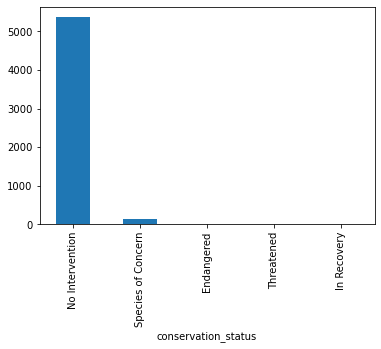

In [72]:
### Your code here
##pandas fillna documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

print(cleaned_df.fillna({"conservation_status":"No Intervention"}).value_counts("conservation_status"))

cleaned_df2=cleaned_df.fillna({"conservation_status":"No Intervention"})
print(cleaned_df2)

cleaned_df.fillna({"conservation_status":"No Intervention"}).value_counts("conservation_status").plot.bar()

### Step 5
Are certain types of species more likely to be endangered?

Let's create a new column in `species` called `is_protected`, which is
1. `False` if `conservation_status` is equal to `No Intervention`, and
2. `True` otherwise.

In [74]:
### Your code here
cleaned_df2['is_protected']=cleaned_df2['conservation_status'].apply(lambda x : x!='No Intervention')
cleaned_df2




category
Amphibian             7
Bird                 75
Fish                 11
Mammal               30
Nonvascular Plant     5
Reptile               5
Vascular Plant       46
Name: is_protected, dtype: int64

Question: How many species on each category is `is_protected`?  Show the result in a pivot table.


In [77]:
### Your code here
cleaned_df2.groupby("category")["is_protected"].agg(["sum","mean"])

,sum,mean
category,,
Amphibian,7,0.088608
Bird,75,0.153689
Fish,11,0.088000
Mammal,30,0.170455
Nonvascular Plant,5,0.015015
Reptile,5,0.064103
Vascular Plant,46,0.010793


Instruction:

Create a new column called `percent_protected`, showing in each category, how many percent of species is `is_protected`.

In [67]:
### Your code here
